In [1]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start = '2018-01-01'
end = '2021-01-01'

In [3]:
data = yf.download('GBPUSD=X', start=start, end=end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
# rsi
rsi = ta.Strategy(
    name='rsi',
    description='rsi',
    ta = [
        {'kind':'rsi', 'length': 14}
    ])

In [5]:
#Golden Cross
golden_strategy = ta.Strategy(
    name = 'golden_cross',
    description = 'golden_cross',
    ta = [
        {'kind':'ema','length':50},
        {'kind':'ema','length':200}
    ])

In [6]:
# macd
macd = ta.Strategy(
    name='macd',
    description='macd',
    ta = [
        {'kind':'macd'}
    ])

In [7]:
data.ta.strategy(golden_strategy)

In [8]:
data.ta.strategy(macd)
data.ta.strategy(rsi)

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA_50,EMA_200,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14
Date,,,,,,,,,,,,
2018-01-01,1.351607,1.351607,1.348199,1.351607,1.351607,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,1.351114,1.359675,1.350931,1.351132,1.351132,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.359453,1.361470,1.349874,1.359619,1.359619,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,1.351169,1.356116,1.350658,1.351132,1.351132,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,1.355381,1.358031,1.352667,1.355289,1.355289,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,1.356963,1.361300,1.351534,1.355201,1.355201,0,1.327918,1.297550,0.006744,0.000239,0.006504,61.748510
2020-12-28,1.357368,1.357773,1.343598,1.357239,1.357239,0,1.329068,1.298144,0.007251,0.000597,0.006654,62.751029
2020-12-29,1.346566,1.352064,1.346185,1.346602,1.346602,0,1.329756,1.298626,0.006717,0.000050,0.006666,54.693837


In [10]:
def golden_cross(data):
    if (data.EMA_50 > data.EMA_200):
        return 1
    else:
        return 0

In [11]:
def macd_cross(data):
    if (data.MACD_12_26_9 > data.MACDs_12_26_9):
        return 1
    else:
        return 0

In [12]:
def rsi_cross(data):
    if (data.RSI_14 > 70) or (data.RSI_14 < 30):
        return 1
    else:
        return 0

In [13]:
data['golden_sig'] = data.apply(golden_cross,axis=1)
data['macd_sig'] = data.apply(macd_cross, axis=1)
data['rsi_sig'] = data.apply(rsi_cross, axis=1)

In [14]:
data

,Open,High,Low,Close,Adj Close,Volume,EMA_50,EMA_200,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,golden_sig,macd_sig,rsi_sig
Date,,,,,,,,,,,,,,,
2018-01-01,1.351607,1.351607,1.348199,1.351607,1.351607,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2018-01-02,1.351114,1.359675,1.350931,1.351132,1.351132,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2018-01-03,1.359453,1.361470,1.349874,1.359619,1.359619,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2018-01-04,1.351169,1.356116,1.350658,1.351132,1.351132,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2018-01-05,1.355381,1.358031,1.352667,1.355289,1.355289,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,1.356963,1.361300,1.351534,1.355201,1.355201,0,1.327918,1.297550,0.006744,0.000239,0.006504,61.748510,1,1,0
2020-12-28,1.357368,1.357773,1.343598,1.357239,1.357239,0,1.329068,1.298144,0.007251,0.000597,0.006654,62.751029,1,1,0
2020-12-29,1.346566,1.352064,1.346185,1.346602,1.346602,0,1.329756,1.298626,0.006717,0.000050,0.006666,54.693837,1,1,0


In [15]:
df=data[['Close','golden_sig','macd_sig','rsi_sig']]
df

,Close,golden_sig,macd_sig,rsi_sig
Date,,,,
2018-01-01,1.351607,0,0,0
2018-01-02,1.351132,0,0,0
2018-01-03,1.359619,0,0,0
2018-01-04,1.351132,0,0,0
2018-01-05,1.355289,0,0,0
...,...,...,...,...
2020-12-25,1.355201,1,1,0
2020-12-28,1.357239,1,1,0
2020-12-29,1.346602,1,1,0


In [16]:
ret = df.Close.pct_change()

In [17]:
ret

Date
2018-01-01         NaN
2018-01-02   -0.000351
2018-01-03    0.006281
2018-01-04   -0.006242
2018-01-05    0.003076
                ...   
2020-12-25    0.003459
2020-12-28    0.001504
2020-12-29   -0.007837
2020-12-30    0.002516
2020-12-31    0.009686
Name: Close, Length: 783, dtype: float64

In [18]:
df

,Close,golden_sig,macd_sig,rsi_sig
Date,,,,
2018-01-01,1.351607,0,0,0
2018-01-02,1.351132,0,0,0
2018-01-03,1.359619,0,0,0
2018-01-04,1.351132,0,0,0
2018-01-05,1.355289,0,0,0
...,...,...,...,...
2020-12-25,1.355201,1,1,0
2020-12-28,1.357239,1,1,0
2020-12-29,1.346602,1,1,0


In [19]:
# must not put first value cause ret is Nan At first value 2018-01-01

In [20]:
X = df.iloc[1:, 1:]
y = ret[1:]

In [33]:
X

,golden_sig,macd_sig,rsi_sig
Date,,,
2018-01-02,0,0,0
2018-01-03,0,0,0
2018-01-04,0,0,0
2018-01-05,0,0,0
2018-01-08,0,0,0
...,...,...,...
2020-12-25,1,1,0
2020-12-28,1,1,0
2020-12-29,1,1,0


In [34]:
y

Date
2018-01-02   -0.000351
2018-01-03    0.006281
2018-01-04   -0.006242
2018-01-05    0.003076
2018-01-08    0.001697
                ...   
2020-12-25    0.003459
2020-12-28    0.001504
2020-12-29   -0.007837
2020-12-30    0.002516
2020-12-31    0.009686
Name: Close, Length: 782, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [23]:
model = LinearRegression()
reg = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Score =',metrics.r2_score(y_test,y_pred))

Score = 0.0022805800710510304


In [24]:
m = model.coef_
b = model.intercept_

In [25]:
m,b

(array([-0.00035019,  0.00113223, -0.00032477]), -0.0004767433794592629)

In [26]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.004200890379384132
MSE =  3.178045779361241e-05
RMSE =  0.005637415879071936


In [27]:
df_report = pd.DataFrame({'Actually':y_test,'Predicted':y_pred})

In [28]:
dfplot=df_report.copy()

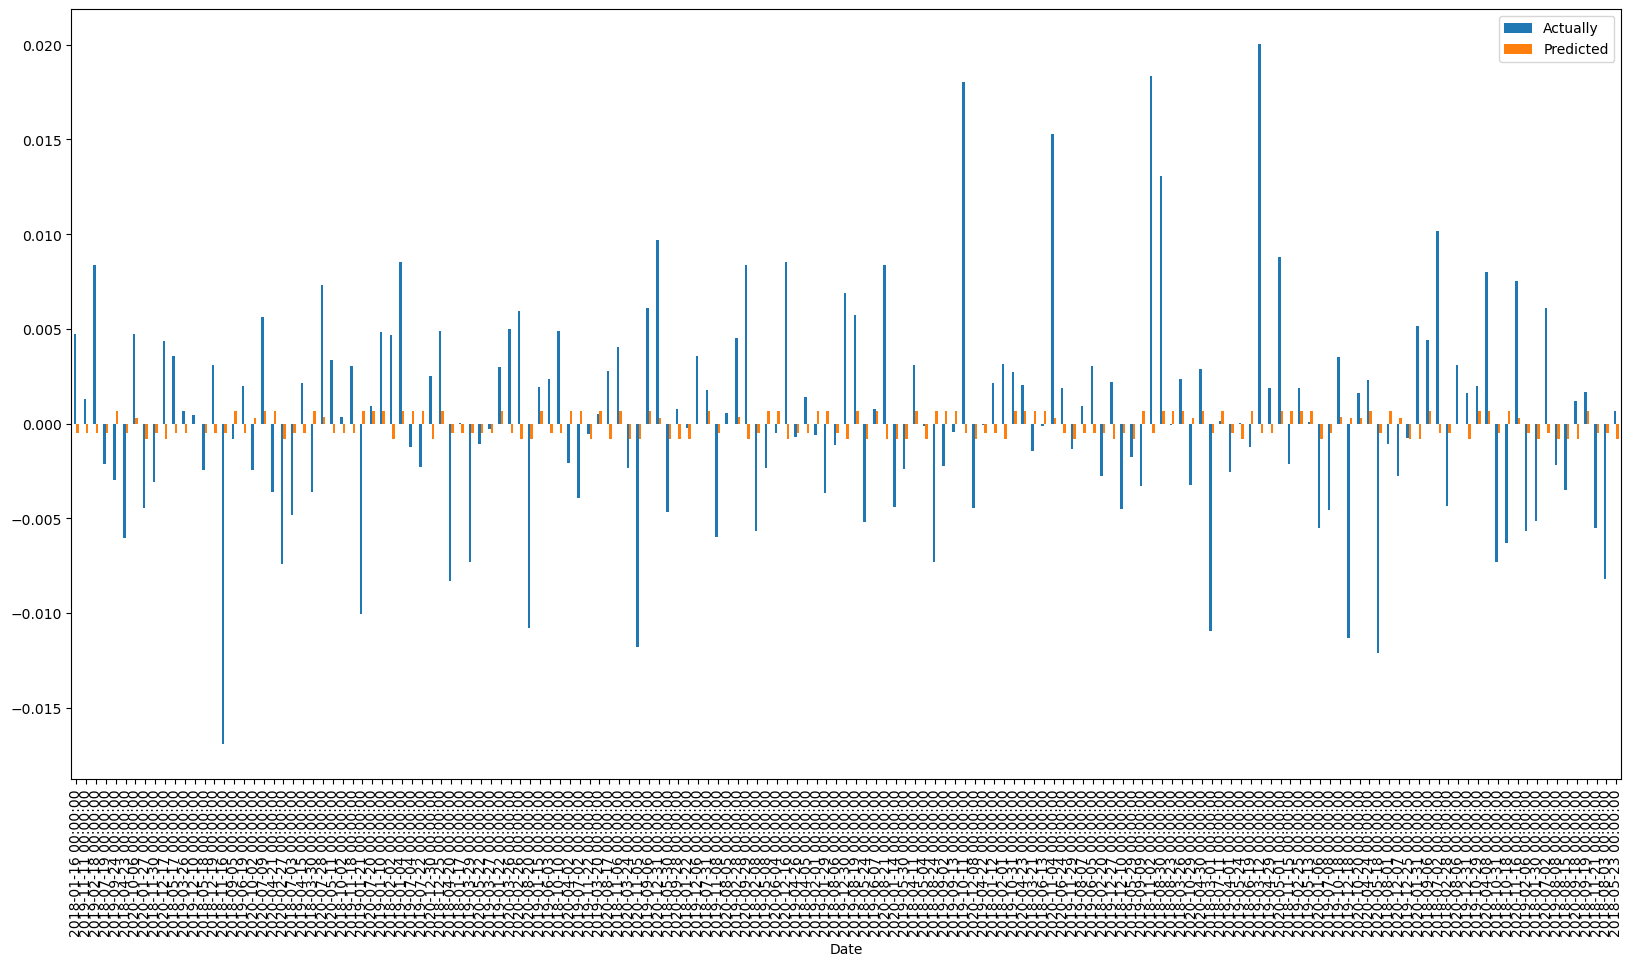

In [30]:
dfplot.plot(kind='bar',figsize=(20,10))
plt.show()

In [31]:
dfplot2=df_report.head(20)

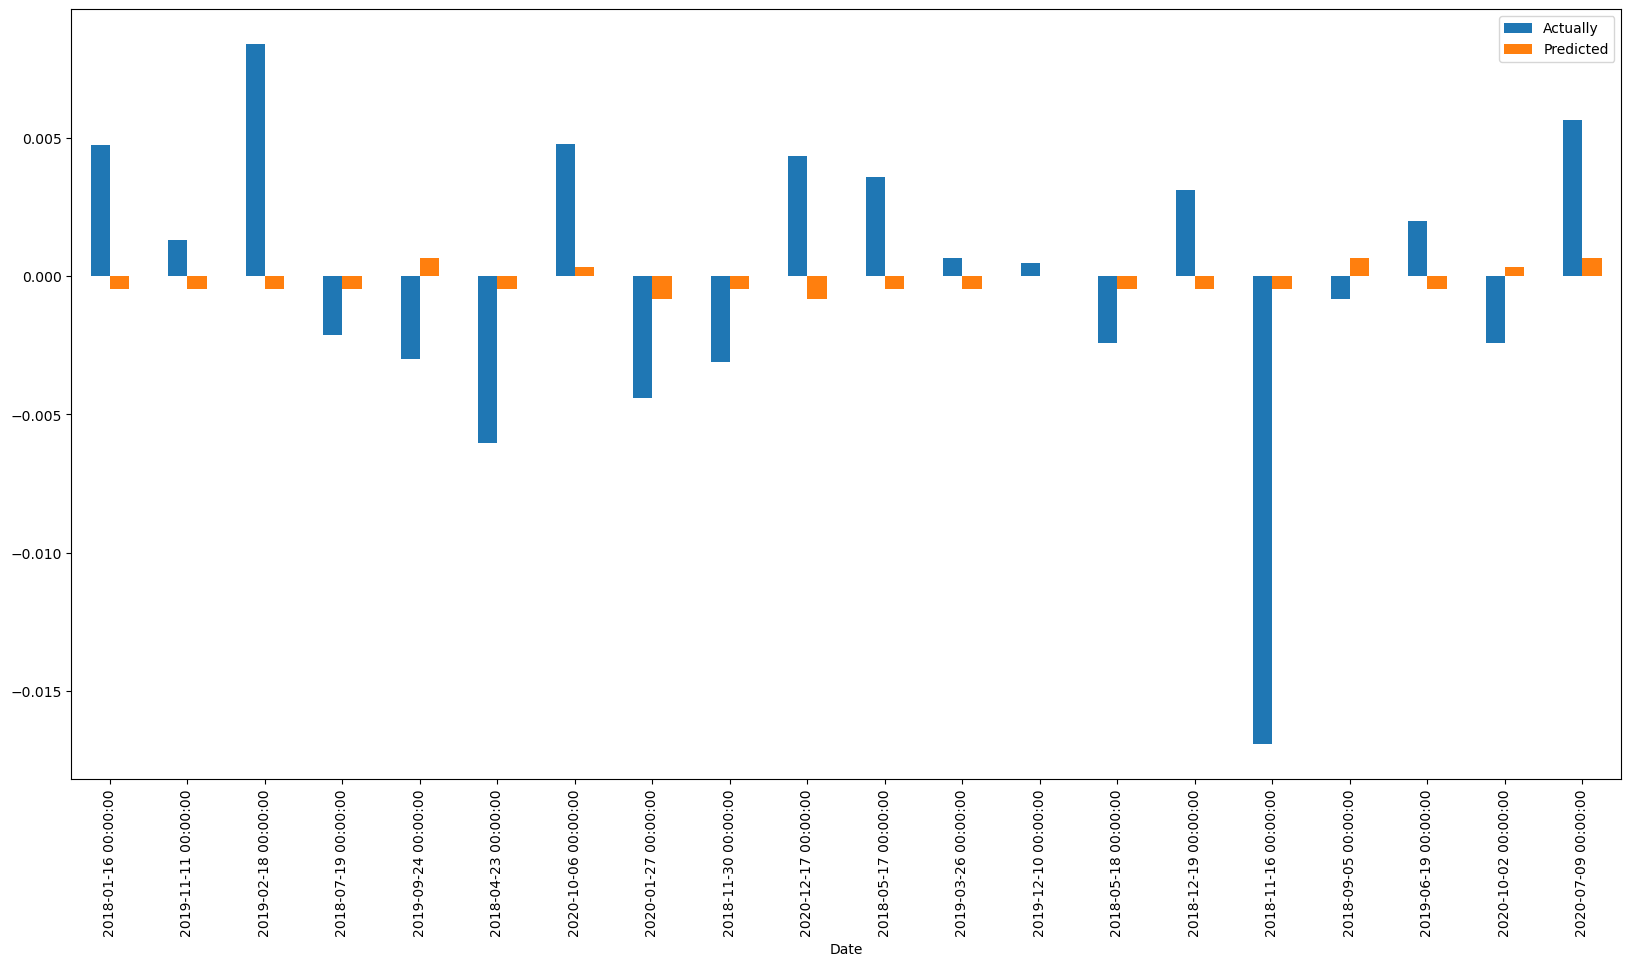

In [32]:
dfplot2.plot(kind='bar',figsize=(20,10))
plt.show()